In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['training-dataset-nsl-kdd', 'my-kdd99']


In [2]:
#data = pd.read_csv('../input/training-dataset-nsl-kdd//Small Training Set.csv')
#data.head(3)

**Data Reading**

In [3]:
data = pd.read_csv('../input/my-kdd99/my_kdd99.csv', header = None)

data.columns = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
                'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
                'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
                'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
                'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
                'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
                'dst_host_srv_rerror_rate','label']

In [4]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.00,1.0,0.0,0.00,9,9,1.0,0.0,0.11,0.00,0.00,0.00,0.00,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.00,1.0,0.0,0.00,19,19,1.0,0.0,0.05,0.00,0.00,0.00,0.00,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.00,1.0,0.0,0.00,29,29,1.0,0.0,0.03,0.00,0.00,0.00,0.00,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.00,1.0,0.0,0.00,39,39,1.0,0.0,0.03,0.00,0.00,0.00,0.00,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.00,1.0,0.0,0.00,49,49,1.0,0.0,0.02,0.00,0.00,0.00,0.00,0.0,normal
5,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.00,1.0,0.0,0.00,59,59,1.0,0.0,0.02,0.00,0.00,0.00,0.00,0.0,normal
6,0,tcp,http,SF,212,1940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.00,0.00,0.0,0.00,1.0,0.0,1.00,1,69,1.0,0.0,1.00,0.04,0.00,0.00,0.00,0.0,normal
7,0,tcp,http,SF,159,4087,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.00,0.00,0.0,0.00,1.0,0.0,0.00,11,79,1.0,0.0,0.09,0.04,0.00,0.00,0.00,0.0,normal
8,0,tcp,http,SF,210,151,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.00,1.0,0.0,0.00,8,89,1.0,0.0,0.12,0.04,0.00,0.00,0.00,0.0,normal
9,0,tcp,http,SF,212,786,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.00,1.0,0.0,0.00,8,99,1.0,0.0,0.12,0.05,0.00,0.00,0.00,0.0,normal


In [5]:
data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [6]:
data.shape

(494020, 42)

In [7]:
data.isnull().values.any()

False

In [8]:
cor=data.corr()
cor

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.004258,0.005440,-0.000452,-0.003235,0.003786,0.013213,0.005239,-0.017265,0.058095,0.021340,0.055853,0.056766,0.074562,-0.000169,0.025661,NaN,NaN,0.023424,-0.105154,-0.080250,-0.031416,-0.031378,0.012053,0.012106,0.021771,0.051800,-0.011790,0.010073,-0.117516,-0.118458,0.406233,0.042642,-0.006983,-0.030400,-0.030612,0.006739,0.010465
src_bytes,0.004258,1.000000,-0.000002,-0.000020,-0.000139,-0.000005,0.004483,-0.000027,0.001701,0.000119,-0.000022,-0.000010,-0.000010,0.000013,0.000005,-0.000052,NaN,NaN,-0.000082,-0.003098,-0.002501,0.001558,0.001114,0.000591,0.001379,-0.001860,0.006207,-0.000015,-0.001743,-0.003212,-0.002052,0.000578,-0.000724,0.001186,-0.000718,0.001122,-0.000393,0.001328
dst_bytes,0.005440,-0.000002,1.000000,-0.000175,-0.001254,0.016288,0.004365,0.049330,0.047814,0.023298,0.031680,0.075656,0.020746,0.004958,0.000144,0.008746,NaN,NaN,0.001289,-0.040373,-0.030544,-0.011908,-0.011930,-0.006166,-0.005808,0.014002,-0.005702,0.008135,-0.048869,-0.005849,0.007058,-0.005314,-0.020143,0.008707,-0.011334,-0.011235,-0.005000,-0.005471
land,-0.000452,-0.000020,-0.000175,1.000000,-0.000318,-0.000017,-0.000295,-0.000065,-0.002784,-0.000038,-0.000070,-0.000031,-0.000038,-0.000075,-0.000066,-0.000184,NaN,NaN,-0.000249,-0.010260,-0.007886,0.013898,0.014422,-0.000777,-0.001659,0.002286,0.002282,0.036985,-0.023671,-0.011587,0.001984,-0.000333,0.003799,0.083320,0.012658,0.007795,-0.001511,-0.001665
wrong_fragment,-0.003235,-0.000139,-0.001254,-0.000318,1.000000,-0.000123,-0.002106,-0.000467,-0.019908,-0.000271,-0.000504,-0.000223,-0.000269,-0.000536,-0.000473,-0.001319,NaN,NaN,-0.001778,-0.061935,-0.047789,-0.013969,-0.022119,-0.011529,-0.011865,0.017416,-0.007077,0.000153,-0.005191,-0.058624,-0.054903,0.071857,-0.031803,0.012092,-0.019091,-0.022104,0.029774,-0.011904
urgent,0.003786,-0.000005,0.016288,-0.000017,-0.000123,1.000000,0.000356,0.141996,0.006164,0.014285,0.034790,-0.000012,0.009476,0.015211,-0.000026,0.020068,NaN,NaN,-0.000096,-0.003997,-0.003047,-0.001193,-0.001192,-0.000638,-0.000639,0.001381,-0.000656,-0.000524,-0.007139,-0.004541,-0.003279,0.010536,-0.002002,-0.000408,-0.001194,-0.001191,-0.000648,-0.000641
hot,0.013213,0.004483,0.004365,-0.000295,-0.002106,0.000356,1.000000,0.008740,0.105306,0.007348,0.024065,-0.000206,0.000998,0.025247,0.006373,0.001902,NaN,NaN,0.843572,-0.068451,-0.052164,-0.020264,-0.020217,-0.008305,-0.005822,0.022697,-0.002686,0.001973,-0.026367,-0.038731,-0.029117,0.001319,-0.052923,-0.004467,-0.019491,-0.020201,-0.006541,-0.007749
num_failed_logins,0.005239,-0.000027,0.049330,-0.000065,-0.000467,0.141996,0.008740,1.000000,-0.001145,0.006907,0.036983,0.117117,0.003250,0.003948,-0.000097,0.003305,NaN,NaN,-0.000365,-0.015185,-0.011578,-0.003169,-0.003850,0.025167,0.025098,0.004581,0.003850,-0.001992,-0.025444,-0.015413,0.000507,0.001017,-0.009565,0.016001,-0.001945,-0.002453,0.024753,0.023584
logged_in,-0.017265,0.001701,0.047814,-0.002784,-0.019908,0.006164,0.105306,-0.001145,1.000000,0.013612,0.025293,0.011208,0.013519,0.026923,0.023776,0.066233,NaN,NaN,0.089319,-0.634641,-0.478120,-0.191697,-0.191112,-0.099136,-0.094372,0.219684,-0.072691,0.330667,-0.621023,0.119324,0.161080,-0.061150,-0.461555,0.140495,-0.190954,-0.191703,-0.090868,-0.087885
num_compromised,0.058095,0.000119,0.023298,-0.000038,-0.000271,0.014285,0.007348,0.006907,0.013612,1.000000,0.255557,0.701400,0.993828,0.010934,0.009341,0.412238,

In [9]:
cor.to_csv('cor.csv')

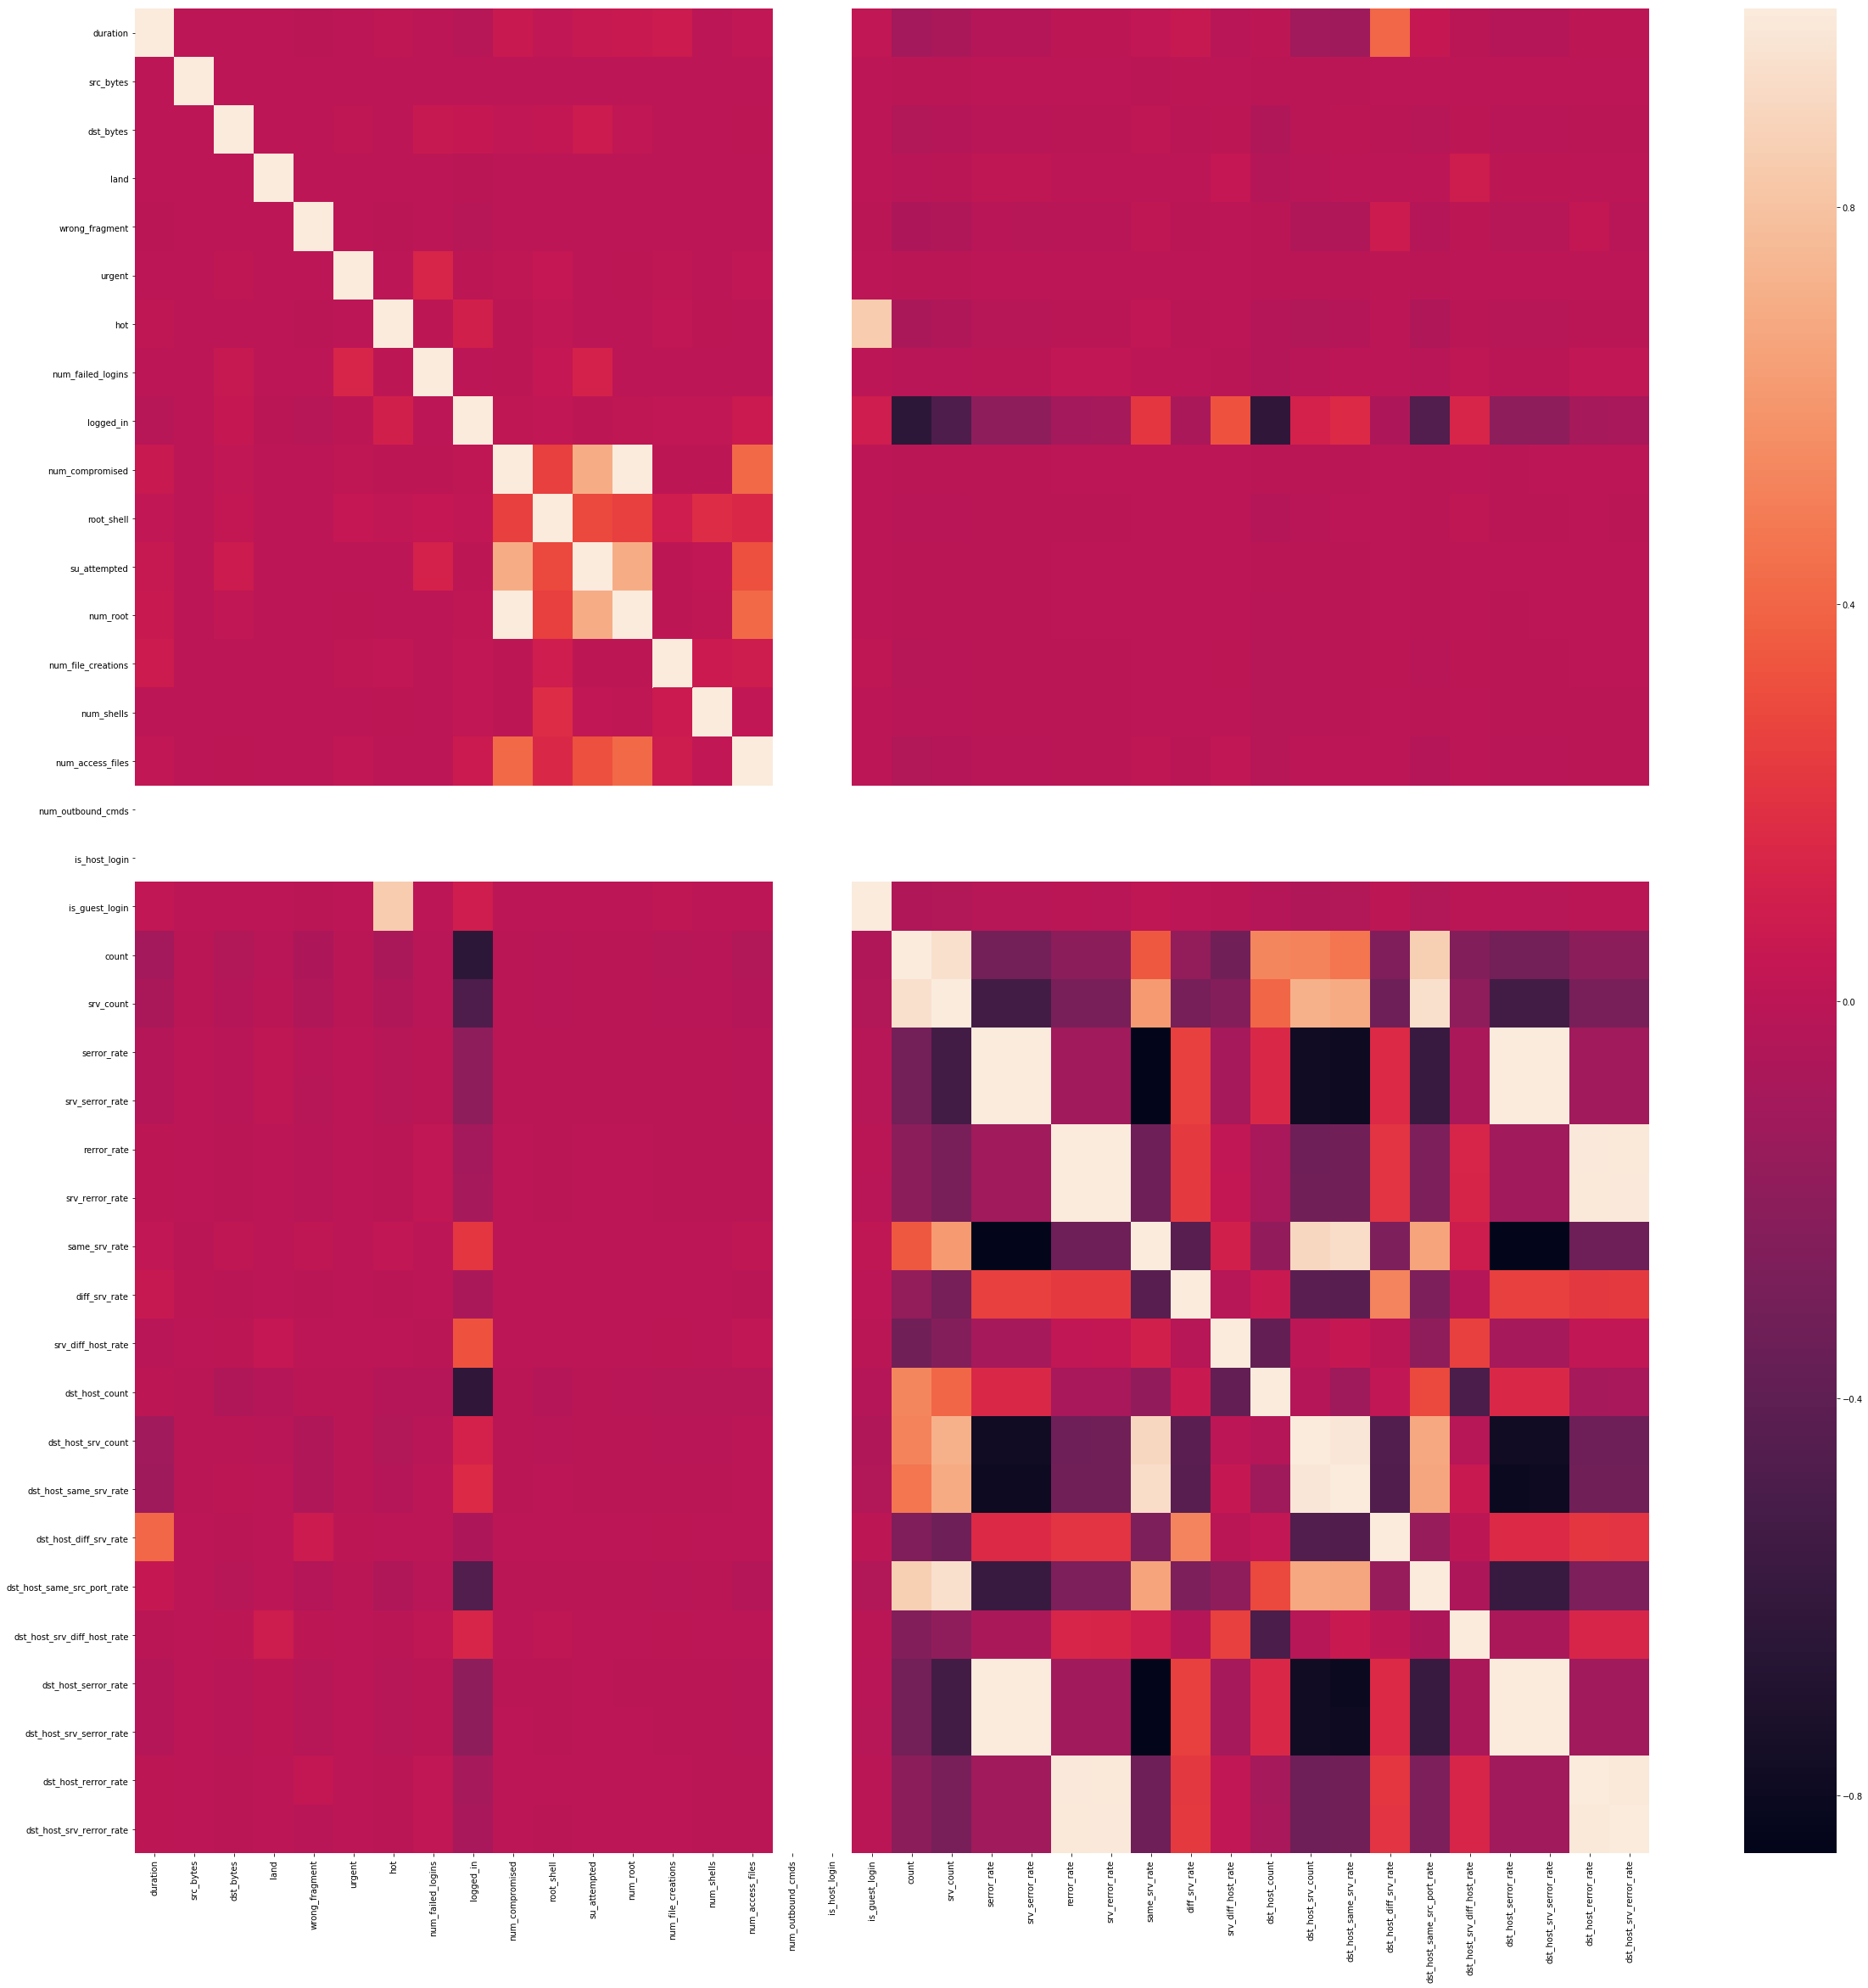

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
#data = pd.read_csv('Dataset.csv')

plt.figure(figsize=(40,40)) 
# play with the figsize until the plot is big enough to plot all the columns
# of your dataset, or the way you desire it to look like otherwise

sns.heatmap(data.corr())

**Preprocessing**

In [11]:
#data.protocol_type.value_counts()

In [12]:
protocol_type_map = {'tcp':0,'udp':1,'icmp':2}

data['protocol_type'] = data['protocol_type'].replace(protocol_type_map)

data['protocol_type']

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
493990    0
493991    0
493992    0
493993    0
493994    0
493995    0
493996    0
493997    0
493998    0
493999    0
494000    0
494001    0
494002    0
494003    0
494004    0
494005    0
494006    0
494007    0
494008    0
494009    0
494010    0
494011    0
494012    0
494013    0
494014    0
494015    0
494016    0
494017    0
494018    0
494019    0
Name: protocol_type, Length: 494020, dtype: int64

In [13]:
#data.label.value_counts()

In [14]:
label_map = {'smurf':0,'neptune':1,'normal':2,'back':3,'satan':4,'ipsweep':5,'portsweep':6,'warezclient':7,'teardrop':8,'pod':9,
             'nmap':10,'guess_passwd':11,'buffer_overflow':12,'land':13,'warezmaster':14,'imap':15,
             'rootkit':16,'loadmodule':17,
             'ftp_write':18,'multihop':19,'phf':20,'perl':21,'spy':22}

data['label'] = data['label'].replace(label_map)

data['label']

0         2
1         2
2         2
3         2
4         2
5         2
6         2
7         2
8         2
9         2
10        2
11        2
12        2
13        2
14        2
15        2
16        2
17        2
18        2
19        2
20        2
21        2
22        2
23        2
24        2
25        2
26        2
27        2
28        2
29        2
         ..
493990    2
493991    2
493992    2
493993    2
493994    2
493995    2
493996    2
493997    2
493998    2
493999    2
494000    2
494001    2
494002    2
494003    2
494004    2
494005    2
494006    2
494007    2
494008    2
494009    2
494010    2
494011    2
494012    2
494013    2
494014    2
494015    2
494016    2
494017    2
494018    2
494019    2
Name: label, Length: 494020, dtype: int64

In [15]:
#data.flag.value_counts()

In [16]:
flag_map = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5,'S1':6,'S2':7,'RSTOS0':8,'S3':9,'OTH':10}

data['flag'] = data['flag'].replace(flag_map)
data['flag']

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
493990    0
493991    0
493992    0
493993    0
493994    0
493995    0
493996    0
493997    0
493998    0
493999    0
494000    1
494001    0
494002    0
494003    0
494004    0
494005    0
494006    0
494007    0
494008    0
494009    0
494010    0
494011    0
494012    0
494013    0
494014    0
494015    0
494016    0
494017    0
494018    0
494019    0
Name: flag, Length: 494020, dtype: int64

In [17]:
#data.service.value_counts()

In [18]:
service_map = {'http':0,'private':1,'domain_u':2,'ftp_data':3,'smtp':4 ,'eco_i':5,'other':6,'telnet':7,'finger':8,'ecr_i':9,'ftp':10,
               'uucp':11,'bgp':12,'Z39_50':13,'csnet_ns':14,'supdup':15,'time':16,'netbios_dgm':17,'whois':18,'iso_tsap':19,'courier':20,
               'imap4':21,'auth':22,'vmnet':23,'uucp_path':24,'hostnames':25,'mtp':26,'echo':27,'login':28,'netbios_ns':29,'gopher':30,
               'exec':31,'urp_i':32,'domain':33,'ldap':34,'discard':35,'remote_job':36,'kshell':37,'name':38,'efs':39,'sql_net':40,
               'klogin':41,'ssh':42,'link':43,'nntp':44,'ctf':45,'shell':46,'http_443':47,'sunrpc':48,'netstat':49,'IRC':50,
               'systat':51,'daytime':52,'nnsp':53,'pop_2':54,'pop_3':55,'printer':56,'ntp_u':57,'X11':58,'tim_i':59,'pm_dump':60,'red_i':61,
              'tftp_u':62,'netbios_ssn':63,'rje':64,'urh_i':65}

data['service'] = data['service'].replace(service_map)
data['service']

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
493990    0
493991    0
493992    0
493993    0
493994    0
493995    0
493996    0
493997    0
493998    0
493999    0
494000    0
494001    0
494002    0
494003    0
494004    0
494005    0
494006    0
494007    0
494008    0
494009    0
494010    0
494011    0
494012    0
494013    0
494014    0
494015    0
494016    0
494017    0
494018    0
494019    0
Name: service, Length: 494020, dtype: int64

In [19]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,0,0,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.00,1.0,0.0,0.00,9,9,1.0,0.0,0.11,0.00,0.00,0.00,0.00,0.0,2
1,0,0,0,0,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.00,1.0,0.0,0.00,19,19,1.0,0.0,0.05,0.00,0.00,0.00,0.00,0.0,2
2,0,0,0,0,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.00,1.0,0.0,0.00,29,29,1.0,0.0,0.03,0.00,0.00,0.00,0.00,0.0,2
3,0,0,0,0,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.00,1.0,0.0,0.00,39,39,1.0,0.0,0.03,0.00,0.00,0.00,0.00,0.0,2
4,0,0,0,0,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.00,1.0,0.0,0.00,49,49,1.0,0.0,0.02,0.00,0.00,0.00,0.00,0.0,2
5,0,0,0,0,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.00,1.0,0.0,0.00,59,59,1.0,0.0,0.02,0.00,0.00,0.00,0.00,0.0,2
6,0,0,0,0,212,1940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.00,0.00,0.0,0.00,1.0,0.0,1.00,1,69,1.0,0.0,1.00,0.04,0.00,0.00,0.00,0.0,2
7,0,0,0,0,159,4087,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.00,0.00,0.0,0.00,1.0,0.0,0.00,11,79,1.0,0.0,0.09,0.04,0.00,0.00,0.00,0.0,2
8,0,0,0,0,210,151,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.00,1.0,0.0,0.00,8,89,1.0,0.0,0.12,0.04,0.00,0.00,0.00,0.0,2
9,0,0,0,0,212,786,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.00,1.0,0.0,0.00,8,99,1.0,0.0,0.12,0.05,0.00,0.00,0.00,0.0,2


**Feature Selection**

In [20]:
# mean od each column
data_mean = data.mean(axis=0)
data_mean


duration                         47.979400
protocol_type                     1.189341
service                           6.071764
flag                              0.297731
src_bytes                      3025.615744
dst_bytes                       868.530774
land                              0.000045
wrong_fragment                    0.006433
urgent                            0.000014
hot                               0.034519
num_failed_logins                 0.000152
logged_in                         0.148245
num_compromised                   0.010212
root_shell                        0.000111
su_attempted                      0.000036
num_root                          0.011352
num_file_creations                0.001083
num_shells                        0.000109
num_access_files                  0.001008
num_outbound_cmds                 0.000000
is_host_login                     0.000000
is_guest_login                    0.001387
count                           332.286361
srv_count  

In [21]:
mean_sum = data_mean.sum()
means_mean = mean_sum/41
means_mean


121.9538860483579

In [22]:
col_name = data_mean.index
col_mean = data_mean.values

feature_score = col_mean / mean_sum
feature_score = feature_score * 100000
feature_score_df = pd.DataFrame(feature_score)

feature_col_name_df= pd.DataFrame(col_name)
feature_concat = pd.concat([feature_col_name_df, feature_score_df], axis=1)
feature_concat.columns = ["feature_col_name_df", "feature_score_df"]
feature_concat

,feature_col_name_df,feature_score_df
0,duration,959.567011
1,protocol_type,23.786290
2,service,121.432631
3,flag,5.954487
4,src_bytes,60510.991777
5,dst_bytes,17370.235671
6,land,0.000891
7,wrong_fragment,0.128656
8,urgent,0.000283
9,hot,0.690362


In [23]:
#threshod = mean_sum / 41
#threshod

In [24]:
feature_selection = feature_concat[(feature_score_df>=1.586937).any(axis=1)]
feature_selection
#1.783407
#1.586937

,feature_col_name_df,feature_score_df
0,duration,959.567011
1,protocol_type,23.786290
2,service,121.432631
3,flag,5.954487
4,src_bytes,60510.991777
5,dst_bytes,17370.235671
11,logged_in,2.964835
22,count,6645.581908
23,srv_count,5858.014537
24,serror_rate,3.533663


In [25]:
feature_score_file = feature_concat.to_csv('feature_selection_score.csv', index = False)


In [26]:
data = data.drop(['wrong_fragment', 'urgent', 'hot','logged_in', 'root_shell', 'su_attempted',
           'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds',
           'is_host_login','is_guest_login','count','srv_rerror_rate','srv_diff_host_rate',
           'dst_host_count','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
           'dst_host_serror_rate'],axis=1)

In [27]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,num_failed_logins,num_compromised,srv_count,serror_rate,srv_serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,0,0,181,5450,0,0,0,8,0.00,0.00,0.0,1.0,0.0,9,1.0,0.00,0.00,0.00,0.0,2
1,0,0,0,0,239,486,0,0,0,8,0.00,0.00,0.0,1.0,0.0,19,1.0,0.00,0.00,0.00,0.0,2
2,0,0,0,0,235,1337,0,0,0,8,0.00,0.00,0.0,1.0,0.0,29,1.0,0.00,0.00,0.00,0.0,2
3,0,0,0,0,219,1337,0,0,0,6,0.00,0.00,0.0,1.0,0.0,39,1.0,0.00,0.00,0.00,0.0,2
4,0,0,0,0,217,2032,0,0,0,6,0.00,0.00,0.0,1.0,0.0,49,1.0,0.00,0.00,0.00,0.0,2
5,0,0,0,0,217,2032,0,0,0,6,0.00,0.00,0.0,1.0,0.0,59,1.0,0.00,0.00,0.00,0.0,2
6,0,0,0,0,212,1940,0,0,0,2,0.00,0.00,0.0,1.0,0.0,69,1.0,0.04,0.00,0.00,0.0,2
7,0,0,0,0,159,4087,0,0,0,5,0.00,0.00,0.0,1.0,0.0,79,1.0,0.04,0.00,0.00,0.0,2
8,0,0,0,0,210,151,0,0,0,8,0.00,0.00,0.0,1.0,0.0,89,1.0,0.04,0.00,0.00,0.0,2
9,0,0,0,0,212,786,0,0,0,8,0.00,0.00,0.0,1.0,0.0,99,1.0,0.05,0.00,0.00,0.0,2


**CNN Start**

In [28]:
import tensorflow.contrib.learn as skflow
import io
import requests
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [29]:
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
            
    
    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(target_type, '__iter__') else target_type

    
    if target_type in (np.int64, np.int32):
        
        dummies = pd.get_dummies(df[target])
        return df.as_matrix(result).astype(np.float32), dummies.as_matrix().astype(np.float32)
    else:
        
        return df.as_matrix(result).astype(np.float32), df.as_matrix([target]).astype(np.float32)



In [30]:
X, y = to_xy(data,'label')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)
print('Shape of X_train dataset is' ,X_train.shape)
print('Shape of X_test dataset is' ,X_test.shape)
print('Shape of y_train dataset is' ,y_train.shape)
print('Shape of y_test dataset is' ,y_test.shape)

Shape of X_train dataset is (395216, 21)
Shape of X_test dataset is (98804, 21)
Shape of y_train dataset is (395216, 23)
Shape of y_test dataset is (98804, 23)


**Create neural net**

In [32]:

model = Sequential()
model.add(Dense(10, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(50, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(10, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.add(Dense(y.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 395216 samples, validate on 98804 samples
Epoch 1/1000
 - 49s - loss: 0.2317 - val_loss: 0.1545
Epoch 2/1000
 - 46s - loss: 0.1583 - val_loss: 0.1323
Epoch 3/1000
 - 46s - loss: 0.1407 - val_loss: 0.1314
Epoch 4/1000
 - 46s - loss: 0.1352 - val_loss: 0.1263
Epoch 5/1000
 - 46s - loss: 0.1323 - val_loss: 0.1267
Epoch 6/1000
 - 46s - loss: 0.1286 - val_loss: 0.1243
Epoch 7/1000
 - 46s - loss: 0.1298 - val_loss: 0.1227
Epoch 8/1000
 - 47s - loss: 0.1285 - val_loss: 0.1299
Epoch 9/1000
 - 46s - loss: 0.1264 - val_loss: 0.1198
Epoch 10/1000
 - 47s - loss: 0.1245 - val_loss: 0.1195
Epoch 11/1000
 - 46s - loss: 0.1315 - val_loss: 0.1228
Epoch 12/1000
 - 47s - loss: 0.1404 - val_loss: 0.1195
Epoch 13/1000
 - 47s - loss: 0.1296 - val_loss: 0.1758
Epoch 14/1000
 - 47s - loss: 0.1339 - val_loss: 0.1203
Epoch 00014: early stopping


**Measure accuracy**

In [33]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_eval = np.argmax(y_test,axis=1)
score = metrics.accuracy_score(y_eval, y_pred)
print("Validation score: {}".format(score))

Validation score: 0.9902736731306425


**Confusion Matrix**

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf =confusion_matrix(y_test,y_pred)
plt.matshow(cf)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('y_test')
plt.ylabel('y_eval')
plt.show();

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

In [35]:
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

print("Training set score for SVM: %f" % final_model.score(X_train , y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test  , y_test ))


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

**K-fold cross validation**

In [36]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold 
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 

for train_index, test_index in kf.split(X):
      print("Train:", train_index, "Validation:",test_index)
      X_train, X_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

Train: [     0      1      2 ... 494017 494018 494019] Validation: [    10     13     14 ... 494010 494011 494014]
Train: [     0      1      2 ... 494016 494017 494019] Validation: [     5      7      8 ... 494006 494007 494018]
Train: [     0      2      3 ... 494017 494018 494019] Validation: [     1      4      6 ... 494008 494012 494016]
Train: [     0      1      3 ... 494015 494016 494018] Validation: [     2     11     12 ... 494013 494017 494019]
Train: [     1      2      4 ... 494017 494018 494019] Validation: [     0      3     15 ... 494004 494009 494015]
Train: [     0      1      3 ... 494015 494016 494018] Validation: [     2     12     16 ... 494009 494017 494019]
Train: [     0      2      3 ... 494017 494018 494019] Validation: [     1      6      9 ... 493996 494003 494015]
Train: [     0      1      2 ... 494017 494018 494019] Validation: [     3      7     14 ... 494010 494011 494012]
Train: [     0      1      2 ... 494016 494017 494019] Validation: [     5      

In [37]:
y_pred

array([0, 0, 1, ..., 2, 2, 0])

In [38]:
y_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [39]:
X_test

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.  ]], dtype=float32)

In [40]:
y_test = pd.DataFrame(y_test)

y_test.to_csv('y_test.csv')

In [41]:
X_test = pd.DataFrame(X_test)

X_test.to_csv('X_test.csv')

In [42]:
y_pred = pd.DataFrame(y_pred)

y_pred.to_csv('y_pred.csv')